# MATSim analysis

### Getting main trips out of synthetic population MATSim results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import numpy as np

Load data

In [2]:
df = pd.read_csv(r"agent_attributes4.csv")

C:\Users\maria\AppData\Local\Temp\ipykernel_3368\86491933.py:1: DtypeWarning: Columns (1,2,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"agent_attributes4.csv")


Remove dummy activities "pt interaction" and the corresponding times/distances/locations

In [3]:
#get the index of where pt interaction happens
def get_ptinteraction_index(item_list):
    return [i for i, val in enumerate(item_list) if val == 'pt interaction']

In [4]:
#remove values at the index of where pt interaction is
def remove_ptinteraction(values, indices):
    # Return original list if indices is empty
    if not indices:
        return values

    # Basic type check (optional but helpful)
    if not isinstance(values, list) or not isinstance(indices, list):
        raise TypeError("Both values and indices should be lists")

    return [val for i, val in enumerate(values) if i not in indices]

In [5]:
#turn plan summaries into lists instead of long strings
df['selected plan activity_type_or_mode'] = df['selected plan activity_type_or_mode'].str.split('; ')
df['selected plan distance_travelled'] = df['selected plan distance_travelled'].str.split('; ')
df['selected plan duration'] = df['selected plan duration'].str.split('; ')
df['selected plan location'] = df['selected plan location'].str.split('; ')

df['unselected plan (1) activity_type_or_mode'] = df['unselected plan (1) activity_type_or_mode'].str.split('; ')
df['unselected plan (1) distance_travelled'] = df['unselected plan (1) distance_travelled'].str.split('; ')
df['unselected plan (1) duration'] = df['unselected plan (1) duration'].str.split('; ')
df['unselected plan (1) location'] = df['unselected plan (1) location'].str.split('; ')

df['unselected plan (2) activity_type_or_mode'] = df['unselected plan (2) activity_type_or_mode'].str.split('; ')
df['unselected plan (2) distance_travelled'] = df['unselected plan (2) distance_travelled'].str.split('; ')
df['unselected plan (2) duration'] = df['unselected plan (2) duration'].str.split('; ')
df['unselected plan (2) location'] = df['unselected plan (2) location'].str.split('; ')

df['unselected plan (3) activity_type_or_mode'] = df['unselected plan (3) activity_type_or_mode'].str.split('; ')
df['unselected plan (3) distance_travelled'] = df['unselected plan (3) distance_travelled'].str.split('; ')
df['unselected plan (3) duration'] = df['unselected plan (3) duration'].str.split('; ')
df['unselected plan (3) location'] = df['unselected plan (3) location'].str.split('; ')

df['unselected plan (4) activity_type_or_mode'] = df['unselected plan (4) activity_type_or_mode'].str.split('; ')
df['unselected plan (4) distance_travelled'] = df['unselected plan (4) distance_travelled'].str.split('; ')
df['unselected plan (4) duration'] = df['unselected plan (4) duration'].str.split('; ')
df['unselected plan (4) location'] = df['unselected plan (4) location'].str.split('; ')

In [6]:
#extract the indices of where pt interaction happens
df['selected ptinteraction_indices'] = df['selected plan activity_type_or_mode'].apply(get_ptinteraction_index)
df['unselected (1) ptinteraction_indices'] = df['unselected plan (1) activity_type_or_mode'].apply(get_ptinteraction_index)
df['unselected (2) ptinteraction_indices'] = df['unselected plan (2) activity_type_or_mode'].apply(get_ptinteraction_index)
df['unselected (3) ptinteraction_indices'] = df['unselected plan (3) activity_type_or_mode'].apply(get_ptinteraction_index)
df['unselected (4) ptinteraction_indices'] = df['unselected plan (4) activity_type_or_mode'].apply(get_ptinteraction_index)

In [7]:
#remove the pt interaction activities
df['selected plan activity_type_or_mode'] = df.apply(lambda row: remove_ptinteraction(row['selected plan activity_type_or_mode'], row['selected ptinteraction_indices']), axis=1)
df['unselected plan (1) activity_type_or_mode'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (1) activity_type_or_mode'], row['unselected (1) ptinteraction_indices']), axis=1)
df['unselected plan (2) activity_type_or_mode'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (2) activity_type_or_mode'], row['unselected (2) ptinteraction_indices']), axis=1)
df['unselected plan (3) activity_type_or_mode'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (3) activity_type_or_mode'], row['unselected (3) ptinteraction_indices']), axis=1)
df['unselected plan (4) activity_type_or_mode'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (4) activity_type_or_mode'], row['unselected (4) ptinteraction_indices']), axis=1)

In [8]:
#remove corresponding distances
df['selected plan distance_travelled'] = df.apply(lambda row: remove_ptinteraction(row['selected plan distance_travelled'], row['selected ptinteraction_indices']), axis=1)
df['unselected plan (1) distance_travelled'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (1) distance_travelled'], row['unselected (1) ptinteraction_indices']), axis=1)
df['unselected plan (2) distance_travelled'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (2) distance_travelled'], row['unselected (2) ptinteraction_indices']), axis=1)
df['unselected plan (3) distance_travelled'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (3) distance_travelled'], row['unselected (3) ptinteraction_indices']), axis=1)
df['unselected plan (4) distance_travelled'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (4) distance_travelled'], row['unselected (4) ptinteraction_indices']), axis=1)

In [9]:
#remove corresponding durations
df['selected plan duration'] = df.apply(lambda row: remove_ptinteraction(row['selected plan duration'], row['selected ptinteraction_indices']), axis=1)
df['unselected plan (1) duration'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (1) duration'], row['unselected (1) ptinteraction_indices']), axis=1)
df['unselected plan (2) duration'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (2) duration'], row['unselected (2) ptinteraction_indices']), axis=1)
df['unselected plan (3) duration'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (3) duration'], row['unselected (3) ptinteraction_indices']), axis=1)
df['unselected plan (4) duration'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (4) duration'], row['unselected (4) ptinteraction_indices']), axis=1)

In [10]:
#remove corresponding locations
df['selected plan location'] = df.apply(lambda row: remove_ptinteraction(row['selected plan location'], row['selected ptinteraction_indices']), axis=1)
df['unselected plan (1) location'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (1) location'], row['unselected (1) ptinteraction_indices']), axis=1)
df['unselected plan (2) location'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (2) location'], row['unselected (2) ptinteraction_indices']), axis=1)
df['unselected plan (3) location'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (3) location'], row['unselected (3) ptinteraction_indices']), axis=1)
df['unselected plan (4) location'] = df.apply(lambda row: remove_ptinteraction(row['unselected plan (4) location'], row['unselected (4) ptinteraction_indices']), axis=1)

In [11]:
df = df.drop('selected ptinteraction_indices', axis=1)
df = df.drop('unselected (1) ptinteraction_indices', axis=1)
df = df.drop('unselected (2) ptinteraction_indices', axis=1)
df = df.drop('unselected (3) ptinteraction_indices', axis=1)
df = df.drop('unselected (4) ptinteraction_indices', axis=1)

Now to select the trip leg that has the longest distance between each activity

In [12]:
# keep only the indices in the activity/leg list which correspond to activities and the longest leg of each trip
# activities can be identified by having N/A distance 
# the longest leg is the longest non-NA distance between each N/A
def filter_max_between_nas_indices_only(lst):
    if not isinstance(lst, list):
        # print(lst)
        # print("error1")
        return []
        
        # raise TypeError(f"Expected a list, got {type(lst)}")

    kept_indices = []    # Indices of values to keep
    buffer = []          # Temporarily holds float values between "N/A"s
    buffer_indices = []  # Their original indices

    for i, val in enumerate(lst):
        if isinstance(val, list):
            raise TypeError(f"Unexpected nested list at index {i}: {val}")

        if val == "N/A":
            # If there is a buffer of float values, keep the max one
            if buffer:
                max_val = max(buffer)
                max_index = buffer_indices[buffer.index(max_val)]
                kept_indices.append(max_index)
                buffer = []
                buffer_indices = []

            # Always keep the index of "N/A"
            kept_indices.append(i)

        else:
            try:
                float_val = float(val)
                buffer.append(float_val)
                buffer_indices.append(i)
            except ValueError:
                raise ValueError(f"Non-numeric value encountered (not 'N/A'): {val}")

    # Handle remaining buffer if list does not end in "N/A"
    if buffer:
        max_val = max(buffer)
        max_index = buffer_indices[buffer.index(max_val)]
        kept_indices.append(max_index)

    return kept_indices

In [13]:
#find indices of activities/modes to keep based on greatest inter-NA distances 
df['selected keep_indices'] = df['selected plan distance_travelled'].apply(filter_max_between_nas_indices_only)
df['unselected (1) keep_indices'] = df['unselected plan (1) distance_travelled'].apply(filter_max_between_nas_indices_only)
df['unselected (2) keep_indices'] = df['unselected plan (2) distance_travelled'].apply(filter_max_between_nas_indices_only)
df['unselected (3) keep_indices'] = df['unselected plan (3) distance_travelled'].apply(filter_max_between_nas_indices_only)
df['unselected (4) keep_indices'] = df['unselected plan (4) distance_travelled'].apply(filter_max_between_nas_indices_only)

In [14]:
#keep only the longest legs for each trip and the real activities
#filter the activities/legs list
df['selected plan activity_type_or_mode'] = df.apply(lambda row: [row['selected plan activity_type_or_mode'][i] for i in row['selected keep_indices']], axis=1)
df['unselected plan (1) activity_type_or_mode'] = df.apply(lambda row: [row['unselected plan (1) activity_type_or_mode'][i] for i in row['unselected (1) keep_indices']], axis=1)
df['unselected plan (2) activity_type_or_mode'] = df.apply(lambda row: [row['unselected plan (2) activity_type_or_mode'][i] for i in row['unselected (2) keep_indices']], axis=1)
df['unselected plan (3) activity_type_or_mode'] = df.apply(lambda row: [row['unselected plan (3) activity_type_or_mode'][i] for i in row['unselected (3) keep_indices']], axis=1)
df['unselected plan (4) activity_type_or_mode'] = df.apply(lambda row: [row['unselected plan (4) activity_type_or_mode'][i] for i in row['unselected (4) keep_indices']], axis=1)

In [15]:
#filter out corresponding distances
df['selected plan distance_travelled'] = df.apply(lambda row: [row['selected plan distance_travelled'][i] for i in row['selected keep_indices']], axis=1)
df['unselected plan (1) distance_travelled'] = df.apply(lambda row: [row['unselected plan (1) distance_travelled'][i] for i in row['unselected (1) keep_indices']], axis=1)
df['unselected plan (2) distance_travelled'] = df.apply(lambda row: [row['unselected plan (2) distance_travelled'][i] for i in row['unselected (2) keep_indices']], axis=1)
df['unselected plan (3) distance_travelled'] = df.apply(lambda row: [row['unselected plan (3) distance_travelled'][i] for i in row['unselected (3) keep_indices']], axis=1)
df['unselected plan (4) distance_travelled'] = df.apply(lambda row: [row['unselected plan (4) distance_travelled'][i] for i in row['unselected (4) keep_indices']], axis=1)

In [16]:
#filter out corresponding durations
df['selected plan duration'] = df.apply(lambda row: [row['selected plan duration'][i] for i in row['selected keep_indices']], axis=1)
df['unselected plan (1) duration'] = df.apply(lambda row: [row['unselected plan (1) duration'][i] for i in row['unselected (1) keep_indices']], axis=1)
df['unselected plan (2) duration'] = df.apply(lambda row: [row['unselected plan (2) duration'][i] for i in row['unselected (2) keep_indices']], axis=1)
df['unselected plan (3) duration'] = df.apply(lambda row: [row['unselected plan (3) duration'][i] for i in row['unselected (3) keep_indices']], axis=1)
df['unselected plan (4) duration'] = df.apply(lambda row: [row['unselected plan (4) duration'][i] for i in row['unselected (4) keep_indices']], axis=1)

In [17]:
#filter out corresponding locations
df['selected plan location'] = df.apply(lambda row: [row['selected plan location'][i] for i in row['selected keep_indices']], axis=1)
df['unselected plan (1) location'] = df.apply(lambda row: [row['unselected plan (1) location'][i] for i in row['unselected (1) keep_indices']], axis=1)
df['unselected plan (2) location'] = df.apply(lambda row: [row['unselected plan (2) location'][i] for i in row['unselected (2) keep_indices']], axis=1)
df['unselected plan (3) location'] = df.apply(lambda row: [row['unselected plan (3) location'][i] for i in row['unselected (3) keep_indices']], axis=1)
df['unselected plan (4) location'] = df.apply(lambda row: [row['unselected plan (4) location'][i] for i in row['unselected (4) keep_indices']], axis=1)

In [18]:
df = df.drop('selected keep_indices', axis=1)
df = df.drop('unselected (1) keep_indices', axis=1)
df = df.drop('unselected (2) keep_indices', axis=1)
df = df.drop('unselected (3) keep_indices', axis=1)
df = df.drop('unselected (4) keep_indices', axis=1)

### Now to do some analysis on the plans

difference between best and worst utility / best and second best utility

In [33]:
#make a list with all the top 5 utilities
df['plan_utilities'] = df[['selected plan utility', 'unselected plan (1) utility', 'unselected plan (2) utility', 'unselected plan (3) utility', 'unselected plan (4) utility']].apply(lambda row: list(row), axis=1)

In [34]:
def get_d_utility_1_2(lst):
    if not isinstance(lst, list):
        return None
        
    list_sorted = sorted(lst, reverse=True)
    second_highest = list_sorted[1]
    index = lst.index(second_highest)
    d_utility_1_2 = max(lst) - lst[index]
    return d_utility_1_2

In [35]:
def get_second_highest_index(lst):
    if not isinstance(lst, list):
        return None
        
    list_sorted = sorted(lst, reverse=True)
    second_highest = list_sorted[1]
    index = lst.index(second_highest)
    return index

In [36]:
df['d_utility_1_5'] = df['plan_utilities'].apply(lambda lst: max(lst)-min(lst) if lst else None)
df['d_utility_1_2'] = df['plan_utilities'].apply(get_d_utility_1_2)

In [37]:
min_change_index1_5 = df.index[df['d_utility_1_5'] == min(df['d_utility_1_5'])][0]
max_change_index1_5 = df.index[df['d_utility_1_5'] == max(df['d_utility_1_5'])][0]
max_change_index1_2 = df.index[df['d_utility_1_2'] == max(df['d_utility_1_2'])][0]

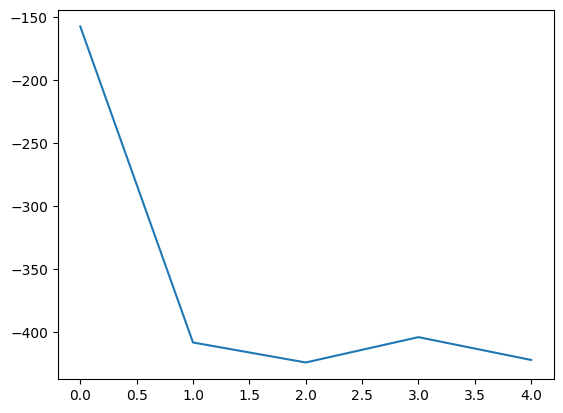

In [38]:
plt.plot(range(0,5), df['plan_utilities'][max_change_index1_2])

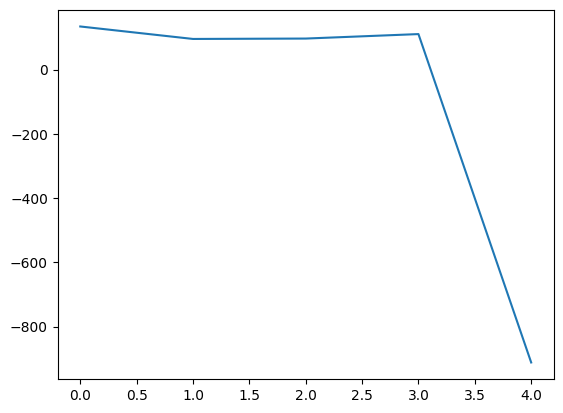

In [39]:
plt.plot(range(0,5), df['plan_utilities'][max_change_index1_5])

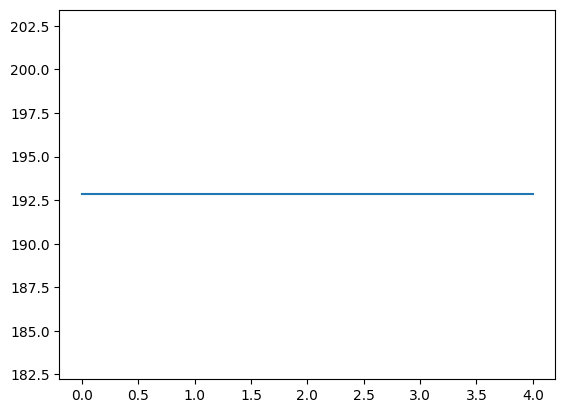

In [40]:
plt.plot(range(0,5), df['plan_utilities'][min_change_index1_5])

In [41]:
# plt.hist(df['d_utility_1_2'], bins=100)
# plt.xlim(0, 50) 
# plt.show()

extract home location from coordinates of "home" activity

In [28]:
def get_home_index(item_list):
    index = [i for i, val in enumerate(item_list) if val == 'home']
    return index if index else [0] # get the index of where home is if there is a home. if no home, return index 0 (first location)

In [29]:
df["home_index"] = df['selected plan activity_type_or_mode'].apply(get_home_index)

In [30]:
def get_home_coords(values, indices):
    if not indices:
        return pd.NA
    if not isinstance(values, list) or not isinstance(indices, list):
        raise TypeError("Both values and indices should be lists")

    first_index = indices[0]
    if 0 <= first_index < len(values):
        return values[first_index]
    else:
        return pd.NA

In [31]:
df["home_coords"] = df.apply(lambda row: get_home_coords(row['selected plan location'], row['home_index']), axis=1)

In [32]:
df = df.dropna(subset=['home_coords'])
df = df.drop('home_index', axis=1)

In [33]:
df[['home_x', 'home_y']] = df['home_coords'].str.split(',', expand=True).astype(float)

In [34]:
from shapely.geometry import Point
def parse_coords(coord_str):
    try:
        if not isinstance(coord_str, str) or ',' not in coord_str:
            return None
        x_str, y_str = coord_str.split(',')
        x, y = float(x_str.strip()), float(y_str.strip())
        return Point(x, y)
    except:
        return None
df['geometry'] = df['home_coords'].apply(parse_coords)
df = df[df['geometry'].notnull()].copy()
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:27700")  

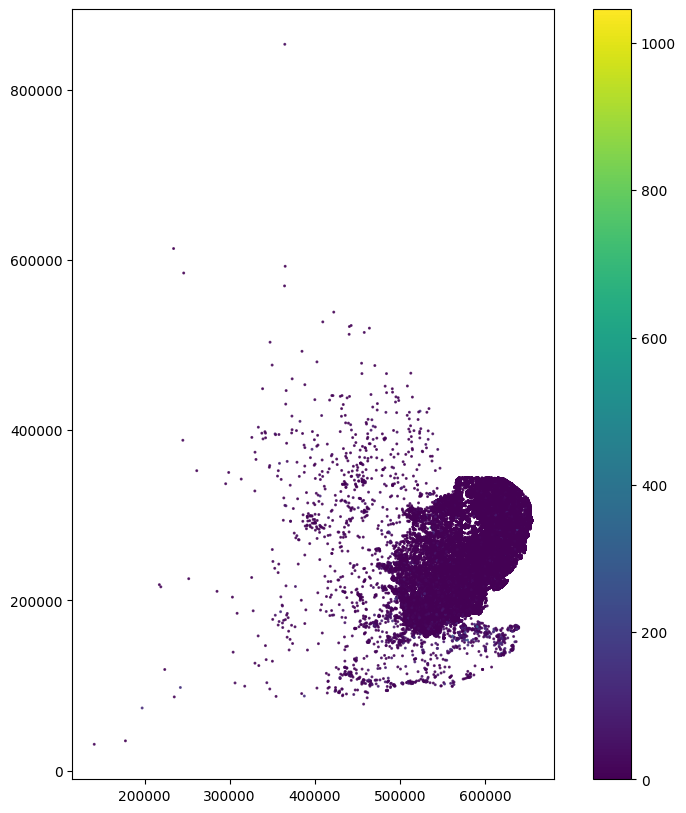

In [35]:
fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(
    ax=ax,
    column='d_utility_1_5',
    cmap='viridis',
    legend=True,
    markersize=5,
    alpha=0.8,
    marker = '.'
)

plt.show()

In [36]:
from shapely.geometry import box
grid_size = 5000  # adjust this to your desired grid cell size

# Get total bounds of your points: (xmin, ymin, xmax, ymax)
xmin, ymin, xmax, ymax = gdf.total_bounds

# Create the grid cells
x_coords = np.arange(xmin, xmax + grid_size, grid_size)
y_coords = np.arange(ymin, ymax + grid_size, grid_size)

grid_cells = []
for x0 in x_coords[:-1]:
    for y0 in y_coords[:-1]:
        x1 = x0 + grid_size
        y1 = y0 + grid_size
        grid_cells.append(box(x0, y0, x1, y1))

grid = gpd.GeoDataFrame({'geometry': grid_cells})
grid.set_crs(gdf.crs, inplace=True)
joined = gpd.sjoin(gdf, grid, how='inner', predicate='within')
grid['mean_d_utility_1_2'] = joined.groupby('index_right')['d_utility_1_2'].median() # should it be mean or median?
grid['mean_d_utility_1_5'] = joined.groupby('index_right')['d_utility_1_5'].median() # should it be mean or median?

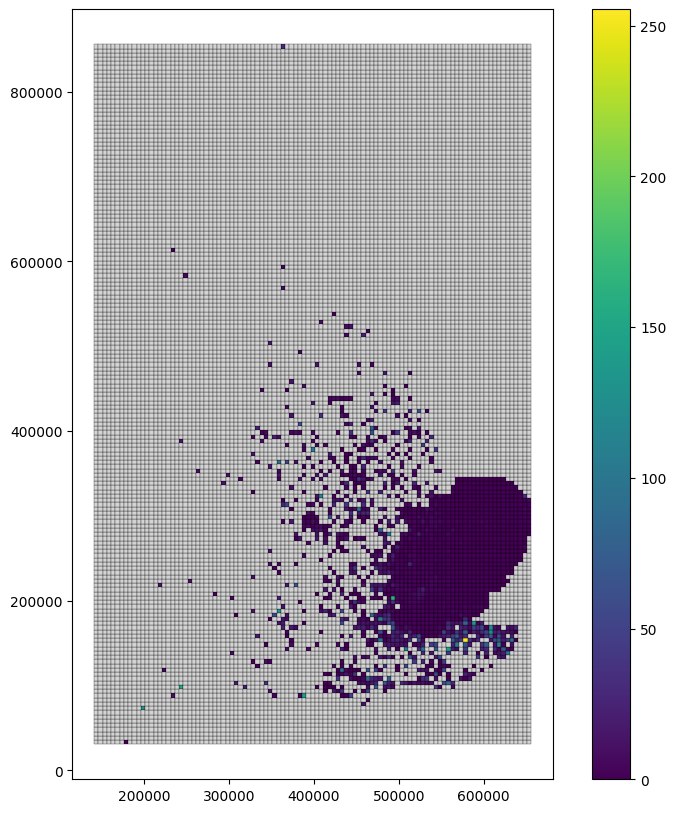

In [37]:
fig, ax = plt.subplots(figsize=(10,10))

grid.plot(
    column='mean_d_utility_1_5',
    ax=ax,
    cmap='viridis',
    legend=True,
    edgecolor='black',
    linewidth=0.2,
    missing_kwds={'color': 'lightgrey'}  # color cells with no points
)

plt.show()

In [38]:
msoa = gpd.read_file("MSOA_2021_Boundaries.gpkg")
msoa.head()

,MSOA21CD,MSOA21NM,MSOA21NMW,BNG_E,BNG_N,LAT,LONG,GlobalID,geometry
0,E02000001,City of London 001,,532384,181355,51.515621,-0.093490,{6EAC4C73-63E6-4757-8C84-DA82C75D9CCE},"MULTIPOLYGON (((532153.703 182165.155, 532149...."
1,E02000002,Barking and Dagenham 001,,548267,189685,51.586521,0.138756,{B44A90FD-98D3-4F82-AE29-1A9113B642C3},"MULTIPOLYGON (((548881.304 190819.98, 548881.3..."
2,E02000003,Barking and Dagenham 002,,548259,188520,51.576061,0.138149,{5C6778E4-1745-40BD-8BEF-C475E0BA805B},"MULTIPOLYGON (((548958.555 189072.176, 548961...."
3,E02000004,Barking and Dagenham 003,,551004,186412,51.556389,0.176828,{3885032B-2F76-46F1-BFCE-300F80A23638},"MULTIPOLYGON (((551550.056 187364.705, 551549...."
4,E02000005,Barking and Dagenham 004,,548733,186824,51.560692,0.144267,{2007DCE4-81F5-4ACF-9DDF-D40A3AAD2B09},"MULTIPOLYGON (((549237.051 187627.941, 549236...."


In [39]:
summary_df_1_5 = df.groupby("hzone", as_index=False)["d_utility_1_5"].median()
summary_df_1_2 = df.groupby("hzone", as_index=False)["d_utility_1_2"].median()
msoa = msoa.merge(summary_df_1_5, left_on="MSOA21CD", right_on="hzone", how="left")
msoa = msoa.merge(summary_df_1_2, left_on="MSOA21CD", right_on="hzone", how="left")

<Axes: >

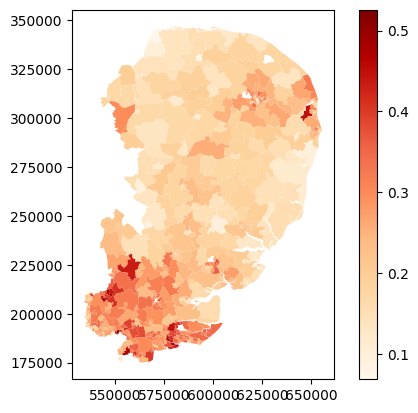

In [40]:
msoa.plot(column="d_utility_1_2", cmap="OrRd", legend=True)

<Axes: >

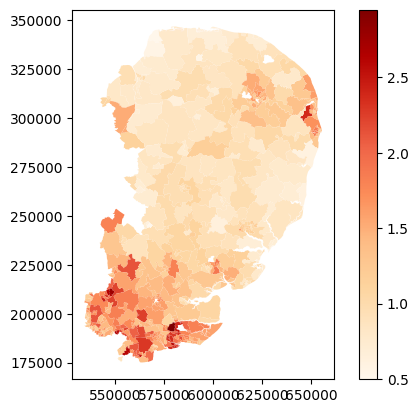

In [41]:
msoa.plot(column="d_utility_1_5", cmap="OrRd", legend=True)

get the variation in mode choice

In [27]:
#activities versus modes
all_activities = {'business', 'delivery', 'depot', 'education', 'escort_business', 'escort_education', 'escort_home', 'escort_other', 'escort_shop', 'escort_work', 'home', 'medical', 'other', 'pt interaction', 'shop', 'visit', 'work'}
all_modes = {'bike', 'bus', 'car', 'car_passenger', 'ferry', 'rail', 'subway', 'taxi', 'tram', 'walk'}


In [42]:
def get_unique_modes(lst):
    if not isinstance(lst, list):
        return []
    lst_modes_unique = set()
    for i in lst:
        if i in all_modes:
            lst_modes_unique.add(i)
    return lst_modes_unique

In [43]:
df['selected plan unique_modes'] = df['selected plan activity_type_or_mode'].apply(get_unique_modes)
df['selected plan no_unique_modes'] = df['selected plan unique_modes'].apply(lambda x: len(x))

df['unselected plan (1) unique_modes'] = df['unselected plan (1) activity_type_or_mode'].apply(get_unique_modes)
df['unselected plan (1) no_unique_modes'] = df['unselected plan (1) unique_modes'].apply(lambda x: len(x))

df['unselected plan (2) unique_modes'] = df['unselected plan (2) activity_type_or_mode'].apply(get_unique_modes)
df['unselected plan (2) no_unique_modes'] = df['unselected plan (2) unique_modes'].apply(lambda x: len(x))

df['unselected plan (3) unique_modes'] = df['unselected plan (3) activity_type_or_mode'].apply(get_unique_modes)
df['unselected plan (3) no_unique_modes'] = df['unselected plan (3) unique_modes'].apply(lambda x: len(x))

df['unselected plan (4) unique_modes'] = df['unselected plan (4) activity_type_or_mode'].apply(get_unique_modes)
df['unselected plan (4) no_unique_modes'] = df['unselected plan (4) unique_modes'].apply(lambda x: len(x))

In [44]:
df['plan_no_modes'] = df[['selected plan no_unique_modes', 'unselected plan (1) no_unique_modes', 'unselected plan (2) no_unique_modes', 'unselected plan (3) no_unique_modes', 'unselected plan (4) no_unique_modes']].apply(lambda row: list(row), axis=1)
df['plan_modes'] = df[['selected plan unique_modes', 'unselected plan (1) unique_modes', 'unselected plan (2) unique_modes', 'unselected plan (3) unique_modes', 'unselected plan (4) unique_modes']].apply(lambda row: list(row), axis=1)

In [45]:
df['max_no_modes'] = df['plan_no_modes'].apply(lambda row: max(row))

(array([6.0000e+01, 3.1167e+05, 0.0000e+00, 6.6761e+04, 0.0000e+00,
        9.0050e+03, 9.7400e+02, 0.0000e+00, 7.8000e+01, 5.0000e+00]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

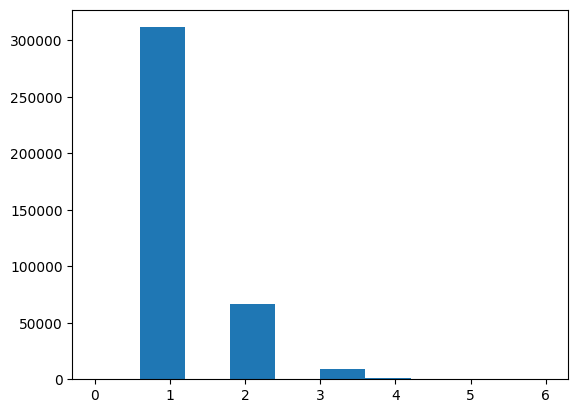

In [46]:
plt.hist(df['max_no_modes'])

In [47]:
df['utility_modes'] = df.apply(lambda row: dict(zip(row['plan_utilities'], row['plan_modes'])), axis=1)
df['utility_no_modes'] = df.apply(lambda row: dict(zip(row['plan_utilities'], row['plan_no_modes'])), axis=1)

In [49]:
#msoa = msoa.drop("hzone_x", axis=1)
summary_df_modes = df.groupby("hzone", as_index=False)["max_no_modes"].mean()
msoa = msoa.merge(summary_df_modes, left_on="MSOA21CD", right_on="hzone", how="left")

<Axes: >

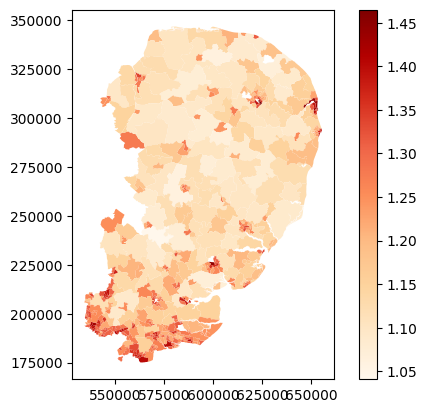

In [50]:
msoa.plot(column="max_no_modes", cmap="OrRd", legend=True)

Look at how the utility changes with respect to number of modes available for highest and second highest scoring plans

In [48]:
#find the difference in the number of modes between trips
#only number - not accounting for if they are different
def get_d_mode_1_2(utilities, modes):
    highest = utilities.index(max(utilities))
    secondhighest = get_second_highest_index(utilities)
    delta_modes = modes[highest]-modes[secondhighest]
    return delta_modes

In [49]:
df['d_mode_1_2'] = df.apply(lambda row: get_d_mode_1_2(row['plan_utilities'], row['plan_no_modes']),axis=1)

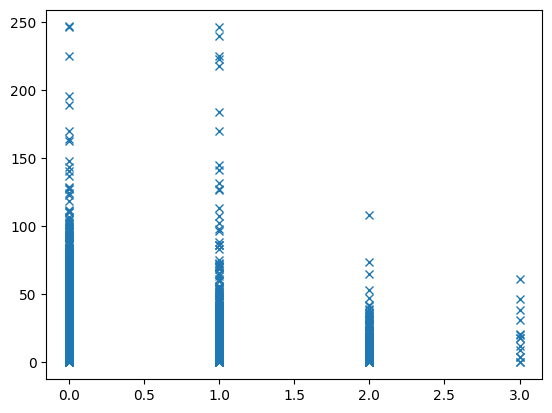

In [50]:
plt.plot(abs(df['d_mode_1_2']), df['d_utility_1_2'], 'x') #so in general, greater utility difference = smaller mode difference
#what does this mean?
#people with more modes to choose from have a lesser utility reduction

In [51]:
#now look at unique modes
#gives the number of modes that are in two and not in one or vice versa
#negative if highest utility has fewer modes than second highest
def get_d_unique_mode_1_2(utilities, utility_mode_dict):
    highest_modes = utility_mode_dict[max(utility_mode_dict)]
    highest_modes = set(highest_modes)
    secondhighest_modes = utility_mode_dict[utilities[get_second_highest_index(utilities)]]
    secondhighest_modes = set(secondhighest_modes)
    highest_only = highest_modes-secondhighest_modes
    secondhighest_only = secondhighest_modes-highest_modes
    if highest_only > secondhighest_only:
        sign = 1
    else:
        sign = -1
    return sign*(len(highest_only)+len(secondhighest_only))

In [52]:
df['d_unique_mode_1_2'] = df.apply(lambda row: get_d_unique_mode_1_2(row['plan_utilities'], row['utility_modes']),axis=1)

(array([2.00000e+00, 4.80000e+01, 1.37800e+03, 5.43200e+03, 0.00000e+00,
        5.46100e+03, 3.71546e+05, 4.51000e+03, 1.70000e+02, 6.00000e+00]),
 array([-5. , -4.2, -3.4, -2.6, -1.8, -1. , -0.2,  0.6,  1.4,  2.2,  3. ]),
 <BarContainer object of 10 artists>)

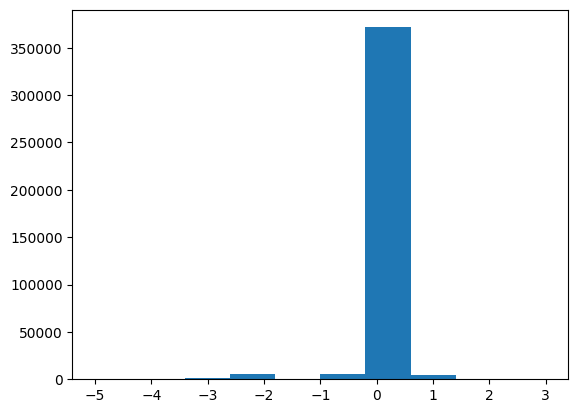

In [53]:
plt.hist(df['d_unique_mode_1_2'])

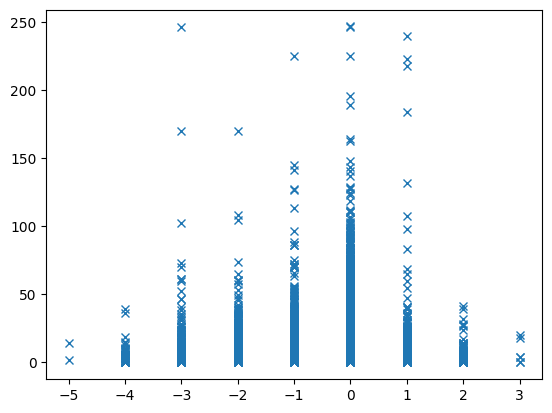

In [54]:
plt.plot(df['d_unique_mode_1_2'], df['d_utility_1_2'],'x')

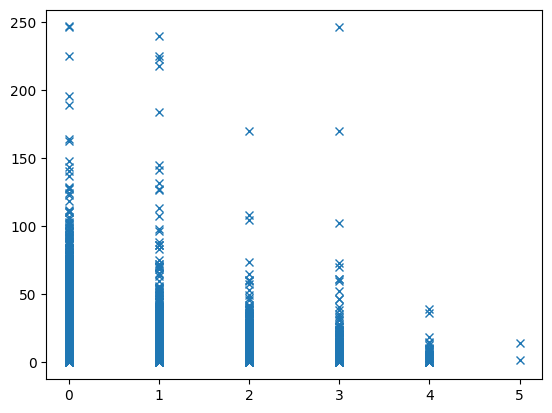

In [55]:
plt.plot(abs(df['d_unique_mode_1_2']), df['d_utility_1_2'],'x')#so in general, greater utility difference = smaller mode difference
#what does this mean?
#people with more modes to choose from have a lesser utility reduction

In [56]:
car_modes = {"car", "car_passenger"}
def get_car_only(modes):
    mode_set = set.union(*modes)
    if mode_set.issubset(car_modes):
        return 1
    else:
        return 0

In [57]:
df['car_dependent'] = df['plan_modes'].apply(lambda x: get_car_only(x))

In [60]:
len(df[df['car_dependent']==1])/len(df)

0.644511816920729

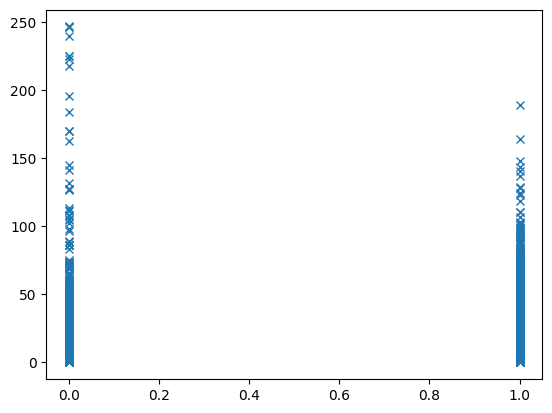

In [58]:
plt.plot(df['car_dependent'], df['d_utility_1_2'],'x')

In [62]:
#map the difference in mode number? bivariate map of mode number and utility? 

#delta modes for d_utility_1_5?
#d_utility_1_x and if mode is same or different?
#d_utility_1_x and difference in initial departure time?
#something to do with car? rank of car only plans to see who is car dependent? who has non-car plans in top 5? who has car-only plans in top 5?
#car dependent people have only car in top plans - do a RF or something on these folks?

In [63]:
df['subpopulation'].unique()

array(['medium', 'low', 'ev_medium', 'high', 'ev_low', 'ev_high', 'lgv',
       'hgv', 'airport'], dtype=object)

In [64]:
air = df[df['subpopulation']=="airport"]

In [65]:
#something to do with specific trips and their difference? how many trips (%) are same/different between plans?

In [66]:
#get departure time difference (first journey)

In [67]:
#cluster / LCA with flexibility and personal attributes

In [68]:
#cluster/LCA/RF/LR on EV ownership

In [69]:
#recreate archetypes

In [70]:
#apply flowchart to find vulnerable people 

## trying to calculate a flexibility metric

In [19]:
def get_delta_u_ij(utility_modes):
    delta_u_ij = []
    utility_modes = dict(sorted(utility_modes.items(), key=lambda item: item[0], reverse=True))  #is this sorting ok?
    #print(utility_modes)
    for i in range(len(utility_modes)-1):
        temp_u = (list(utility_modes.keys())[i]-list(utility_modes.keys())[i+1])#/abs(list(utility_modes.keys())[i])
        delta_u_ij.append(temp_u)
    return delta_u_ij

In [20]:
#this function definitely needs more work to make it a more refined comparison between modes 
def get_delta_m_ij(utility_modes):
    delta_m_ij = []
    unique_m = []
    utility_modes = dict(sorted(utility_modes.items(), key=lambda item: item[0], reverse=True))  #is this sorting ok?
    append_unique = lambda lst, val: (lst.append(val) or lst) if val not in lst else lst
    for i in range(len(utility_modes)-1):
        if ((list(utility_modes.values())[i] != list(utility_modes.values())[i+1]) and (list(utility_modes.values())[i+1] not in unique_m)):
            temp_m = 1 
        else:
            temp_m = 0
        delta_m_ij.append(temp_m)
        append_unique(unique_m, list(utility_modes.values())[i]) #add the modes just considered to the list to discount them in future
        append_unique(unique_m, list(utility_modes.values())[i+1])
    return delta_m_ij

In [21]:
df["delta_u_ij"] = df["utility_modes"].apply(get_delta_u_ij)

KeyError: 'utility_modes'

In [ ]:
df["delta_m_ij"] = df["utility_modes"].apply(get_delta_m_ij)

In [22]:
def get_f_value(delta_u_ij, delta_m_ij):
    f = 0
    for i in range(len(delta_u_ij)):
        f += delta_m_ij[i]/delta_u_ij[i] #maybe add a weighitng here too such as 1/(i+1)
    return f

In [ ]:
# df["delta_u_ij"] = df["utility_modes"].apply(get_delta_u_ij)
# df["delta_m_ij"] = df["utility_modes"].apply(get_delta_m_ij)
df["f"] = df.apply(lambda row: get_f_value(row['delta_u_ij'], row['delta_m_ij']), axis=1)

In [ ]:
len(df[df["f"]==0])/len(df) #so only 10% of people have any mode choice flexibility in this formulation
#i think the issue lies in it being the whole day plan rather than a given trip 
#try trip-specific

0.903280110581143

In [ ]:
df2 = df[["hcounty", "f"]]
# plt.plot(df2["age"], df2["f"],"x")
df2.groupby('hcounty', as_index=False).mean()

,hcounty,f
0,Barking and Dagenham,11151.945445
1,Barnet,12.229286
2,Bedford,-24.787636
3,Bexley,114.767641
4,Brent,8.643168
5,Bromley,28.422663
6,Cambridgeshire,4.718548
7,Camden,10.754771
8,Central Bedfordshire,-18.561140
9,City of London,24.630184


## extract specific trip purposes

In [ ]:
# get the list of purposes
# find the first instance of X purpose and save the index
# get the corresponding index of mode and departure time as well as utility
# repeat for all 4 other plans

In [19]:
a = df.head(5)

In [ ]:
print([i for i, val in enumerate(a["selected plan activity_type_or_mode"][1]) if val == "visit"][0])


2


: 

In [ ]:
def get_delta_t_ij(durations):
    

In [ ]:
def get_purpose_trip(activities, modes, duration, utilities, purpose="work"):
    purp_index = [i for i, val in enumerate(activities) if val == purpose][0] #activities is "selected plan activity_type_or_mode"
    purp_index = purp_index - 1 #get the travel that happens just before work
    

get the columns named "unselected plan (4) activity_type_or_mode" and separate out modes and activities using the all_modes and all_activities lists. then add up durations to get start times. extract corresponding times/distances/locations. 

consider how to account for multiple trips in one plan - compare each corresponding leg one by one and sum for a given plan's F?

In [23]:
def get_modes_only_indices(activities_modes):
    indices = []
    for i in range(len(activities_modes)):
        if activities_modes[i] in all_modes:
            indices.append(i)
    return indices

In [24]:
def get_modes_info_only(plan_data, mode_indices):
    modes = []
    # activities = []
    for i in range(len(plan_data)):
        if i in mode_indices:
            modes.append(plan_data[i])
    return modes

In [28]:
df["modes_indices"] = df["selected plan activity_type_or_mode"].apply(get_modes_only_indices)

In [29]:
df["selected modes_list"] = df.apply(lambda row: get_modes_info_only(row['selected plan activity_type_or_mode'], row['modes_indices']),axis=1)
df["unselected 1 modes_list"] = df.apply(lambda row: get_modes_info_only(row['unselected plan (1) activity_type_or_mode'], row['modes_indices']),axis=1)
df["unselected 2 modes_list"] = df.apply(lambda row: get_modes_info_only(row['unselected plan (2) activity_type_or_mode'], row['modes_indices']),axis=1)
df["unselected 3 modes_list"] = df.apply(lambda row: get_modes_info_only(row['unselected plan (3) activity_type_or_mode'], row['modes_indices']),axis=1)
df["unselected 4 modes_list"] = df.apply(lambda row: get_modes_info_only(row['unselected plan (4) activity_type_or_mode'], row['modes_indices']),axis=1)

In [30]:
df['plan_all_modes'] = df[['selected modes_list', 'unselected 1 modes_list', 'unselected 2 modes_list', 'unselected 3 modes_list', 'unselected 4 modes_list']].apply(lambda row: list(row), axis=1)
df['plan_utilities'] = df[['selected plan utility', 'unselected plan (1) utility', 'unselected plan (2) utility', 'unselected plan (3) utility', 'unselected plan (4) utility']].apply(lambda row: list(row), axis=1)
df['utility_modes'] = df.apply(lambda row: dict(zip(row['plan_utilities'], row['plan_all_modes'])), axis=1)

Comparing whole plan as one thing

In [31]:
df["delta_u_ij"] = df["utility_modes"].apply(get_delta_u_ij)
df["delta_m_ij"] = df["utility_modes"].apply(get_delta_m_ij)
df["f"] = df.apply(lambda row: get_f_value(row['delta_u_ij'], row['delta_m_ij']), axis=1)

In [32]:
len(df[df["f"]!=0])/len(df) 

0.10517741466415136

comparing plan legs  

In [34]:
len(a["utility_modes"][0])

5

In [ ]:
#this function definitely needs more work to make it a more refined comparison between modes 
def get_delta_m_ij_legs(utility_modes):
    leg_delta_m_ij = []
    unique_m = []
    utility_modes = dict(sorted(utility_modes.items(), key=lambda item: item[0], reverse=True))  #is this sorting ok?
    append_unique = lambda lst, val: (lst.append(val) or lst) if val not in lst else lst
    for i in range(len(utility_modes[0])): #for each leg (number of legs constant)
        




        if ((list(utility_modes.values())[i] != list(utility_modes.values())[i+1]) and (list(utility_modes.values())[i+1] not in unique_m)):
            temp_m = 1 
        else:
            temp_m = 0
        delta_m_ij.append(temp_m)
        append_unique(unique_m, list(utility_modes.values())[i]) #add the modes just considered to the list to discount them in future
        append_unique(unique_m, list(utility_modes.values())[i+1])
    return delta_m_ij